<a href="https://colab.research.google.com/github/Saai151/Python-projects/blob/main/Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns





from sklearn import linear_model

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

In [ ]:
df=sns.load_dataset('diamonds')

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df = pd.get_dummies(df, columns = ['cut'])

In [ ]:
df

,carat,color,clarity,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,0,0,1,0
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,1,0,0,0
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0
53936,0.72,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,0,0,0,1,0
53937,0.70,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0
53938,0.86,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,1,0,0,0


In [ ]:
df['colour_mapped'] = df['color'].map({'D': 7,'E': 6,'F': 5,'G': 4,'H': 3, 'I': 2, 'J': 1})
df=df.drop(columns = 'color')

In [ ]:
df = df.drop(columns = 'clarity')

In [ ]:
df

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,colour_mapped
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0,6
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,6
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,1,0,6
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,0,0,2
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,7
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,0,0,1,0,7
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,1,0,0,7
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,1,0,0,0,3


In [ ]:
first_pred = df['carat']*1000
true_price = df['price']

In [ ]:
df=df.drop(columns = 'price')

In [ ]:
first_error = first_pred-true_price

In [ ]:
first_error = first_error.abs().mean()

In [ ]:
first_error

3134.8599740452355

In [ ]:
mean_absolute_error(y_true = true_price, y_pred = first_pred)

3134.8599740452355

In [ ]:
mean_squared_error(y_true = true_price, y_pred = first_pred)

22481897.803911753

In [ ]:
second_pred = df['carat']*1000 + df['depth']*50.7674

In [ ]:
mean_absolute_error(y_true = true_price, y_pred = second_pred)

2668.7929961553577

In [ ]:
mean_squared_error(y_true = true_price, y_pred = second_pred)

12667965.057203408

Therefore we were further off with our first predictions than our second predictions.

In [ ]:
first_linear_model = linear_model.LinearRegression()

In [ ]:
first_linear_model.fit(X = df, y = true_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
first_linear_model.predict(X=df)

array([ 661.4128749 ,  183.20903802,  100.21420953, ..., 3359.53973706,
       3727.64936183, 4207.63025879])

In [ ]:
model_predictions = first_linear_model.predict(X=df)

In [ ]:
mean_absolute_error(y_true = true_price, y_pred = model_predictions)

886.5396794420403

After using the predictions obtained by using the linear_model.LinearRegression command as you can see we have reduced the mean absolute error signficantly, this truly shows the power of machine learnin and AI, and how it trains itself to predict data.

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

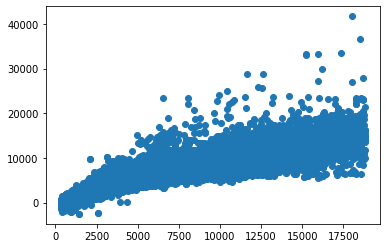

In [ ]:
fig, ax = plt.subplots()
ax.scatter(true_price, model_predictions)
fig.show

In [ ]:
first_linear_model.coef_

array([11142.95983074,  -117.04723909,   -44.300395  , -1346.31049172,
          41.12616406,    23.59799089,   495.558991  ,   234.84720666,
         277.17580611,   -27.29157086,  -980.2904329 ,   258.59304467])

In [ ]:
df

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,colour_mapped
0,0.23,61.5,55.0,3.95,3.98,2.43,1,0,0,0,0,6
1,0.21,59.8,61.0,3.89,3.84,2.31,0,1,0,0,0,6
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,0,1,0,6
3,0.29,62.4,58.0,4.20,4.23,2.63,0,1,0,0,0,2
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,1,0,0,0,0,7
53936,0.72,63.1,55.0,5.69,5.75,3.61,0,0,0,1,0,7
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,1,0,0,7
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,1,0,0,0,3


Now I'm going to work with a different data set, and train my program to predict the MPG of a car based on other aspects.

In [ ]:
df_carsin = sns.load_dataset("mpg")
df_cars = df_carsin.dropna().copy()
df_cars['weight_to_hp_ratio'] = df_cars['horsepower'] / df_cars['weight']
df_cars = pd.get_dummies(df_cars, columns = ['origin'])
df_cars = df_cars.drop(columns = ['name'])
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,weight_to_hp_ratio,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0.037100,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0.044679,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0.043655,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0.043694,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0.040591,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
true_mpg = df_cars['mpg']
df_cars_X= df_cars.drop(columns = 'mpg')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cars_X, true_mpg, test_size = 0.20 )

In [ ]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,weight_to_hp_ratio,origin_europe,origin_japan,origin_usa
257,6,232.0,90.0,3210,17.2,78,0.028037,0,0,1
381,4,107.0,75.0,2205,14.5,82,0.034014,0,1,0
250,8,318.0,140.0,3735,13.2,78,0.037483,0,0,1
99,6,232.0,100.0,2945,16.0,73,0.033956,0,0,1
312,4,86.0,65.0,2019,16.4,80,0.032194,0,1,0
...,...,...,...,...,...,...,...,...,...,...
282,4,140.0,88.0,2890,17.3,79,0.030450,0,0,1
371,4,135.0,84.0,2525,16.0,82,0.033267,0,0,1
91,8,400.0,150.0,4464,12.0,73,0.033602,0,0,1
351,4,98.0,65.0,2045,16.2,81,0.031785,0,0,1


In [ ]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model_year,weight_to_hp_ratio,origin_europe,origin_japan,origin_usa
241,6,146.0,97.0,2815,14.5,77,0.034458,0,1,0
57,4,113.0,95.0,2278,15.5,72,0.041703,0,1,0
345,4,81.0,60.0,1760,16.1,81,0.034091,0,1,0
186,4,101.0,83.0,2202,15.3,76,0.037693,1,0,0
65,8,351.0,153.0,4129,13.0,72,0.037055,0,0,1
...,...,...,...,...,...,...,...,...,...,...
385,4,91.0,67.0,1995,16.2,82,0.033584,0,1,0
396,4,120.0,79.0,2625,18.6,82,0.030095,0,0,1
337,4,107.0,72.0,2290,17.0,80,0.031441,0,1,0
216,4,98.0,68.0,2045,18.5,77,0.033252,0,1,0


In [ ]:
y_train

257    19.4
381    36.0
250    19.4
99     18.0
312    37.2
       ... 
282    22.3
371    29.0
91     13.0
351    34.4
184    25.0
Name: mpg, Length: 313, dtype: float64

In [ ]:
y_test

241    22.0
57     24.0
345    35.1
186    27.0
65     14.0
       ... 
385    38.0
396    28.0
337    32.4
216    31.5
173    24.0
Name: mpg, Length: 79, dtype: float64

In [ ]:
cars_linear_model = linear_model.LinearRegression()

In [ ]:
cars_linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted_test=cars_linear_model.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predicted_test)

9.175118116955215

Here is displayed the mean_square_error that is obtained when using my trianed model, note that the error is squared, and the absolute error would only be around 3 mpg.

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

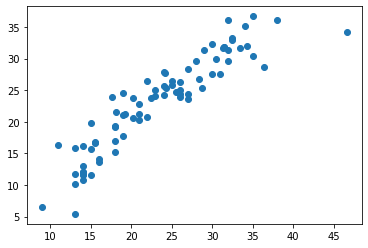

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test,y_predicted_test)
fig.show

## Cars 2

In [ ]:
df_carsin = sns.load_dataset("mpg")
df_cars2 = df_carsin.dropna().copy()
df_cars2['weight_to_hp_ratio'] = df_cars['horsepower'] / df_cars['weight']
df_cars2 = pd.get_dummies(df_cars2, columns = ['origin', 'name'])
df_cars2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,weight_to_hp_ratio,origin_europe,origin_japan,origin_usa,name_amc ambassador brougham,name_amc ambassador dpl,name_amc ambassador sst,name_amc concord,name_amc concord d/l,name_amc concord dl 6,name_amc gremlin,name_amc hornet,name_amc hornet sportabout (sw),name_amc matador,name_amc matador (sw),name_amc pacer,name_amc pacer d/l,name_amc rebel sst,name_amc spirit dl,name_audi 100 ls,name_audi 100ls,name_audi 4000,name_audi 5000,name_audi 5000s (diesel),name_audi fox,name_bmw 2002,name_bmw 320i,name_buick century,name_buick century 350,name_buick century limited,name_buick century luxus (sw),name_buick century special,name_buick electra 225 custom,...,name_toyota celica gt liftback,name_toyota corolla,name_toyota corolla 1200,name_toyota corolla 1600 (sw),name_toyota corolla liftback,name_toyota corolla tercel,name_toyota corona,name_toyota corona hardtop,name_toyota corona liftback,name_toyota corona mark ii,name_toyota cressida,name_toyota mark ii,name_toyota starlet,name_toyota tercel,name_toyouta corona mark ii (sw),name_triumph tr7 coupe,name_vokswagen rabbit,name_volkswagen 1131 deluxe sedan,name_volkswagen 411 (sw),name_volkswagen dasher,name_volkswagen jetta,name_volkswagen model 111,name_volkswagen rabbit,name_volkswagen rabbit custom,name_volkswagen rabbit custom diesel,name_volkswagen rabbit l,name_volkswagen scirocco,name_volkswagen super beetle,name_volkswagen type 3,name_volvo 144ea,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,0.037100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0.044679,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0.043655,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0.043694,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0.040591,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
true_mpg2 = df_cars2['mpg']
df_cars2_X = df_cars2.drop (columns = ['mpg'])

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_cars2_X, true_mpg2, test_size = 0.20)

In [ ]:
cars_linear_model2 = linear_model.LinearRegression()

In [ ]:
X_train2

,cylinders,displacement,horsepower,weight,acceleration,model_year,weight_to_hp_ratio,origin_europe,origin_japan,origin_usa,name_amc ambassador brougham,name_amc ambassador dpl,name_amc ambassador sst,name_amc concord,name_amc concord d/l,name_amc concord dl 6,name_amc gremlin,name_amc hornet,name_amc hornet sportabout (sw),name_amc matador,name_amc matador (sw),name_amc pacer,name_amc pacer d/l,name_amc rebel sst,name_amc spirit dl,name_audi 100 ls,name_audi 100ls,name_audi 4000,name_audi 5000,name_audi 5000s (diesel),name_audi fox,name_bmw 2002,name_bmw 320i,name_buick century,name_buick century 350,name_buick century limited,name_buick century luxus (sw),name_buick century special,name_buick electra 225 custom,name_buick estate wagon (sw),...,name_toyota celica gt liftback,name_toyota corolla,name_toyota corolla 1200,name_toyota corolla 1600 (sw),name_toyota corolla liftback,name_toyota corolla tercel,name_toyota corona,name_toyota corona hardtop,name_toyota corona liftback,name_toyota corona mark ii,name_toyota cressida,name_toyota mark ii,name_toyota starlet,name_toyota tercel,name_toyouta corona mark ii (sw),name_triumph tr7 coupe,name_vokswagen rabbit,name_volkswagen 1131 deluxe sedan,name_volkswagen 411 (sw),name_volkswagen dasher,name_volkswagen jetta,name_volkswagen model 111,name_volkswagen rabbit,name_volkswagen rabbit custom,name_volkswagen rabbit custom diesel,name_volkswagen rabbit l,name_volkswagen scirocco,name_volkswagen super beetle,name_volkswagen type 3,name_volvo 144ea,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
116,8,400.0,230.0,4278,9.5,73,0.053763,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
133,6,250.0,100.0,3781,17.0,74,0.026448,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
171,4,134.0,96.0,2702,13.5,75,0.035529,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
275,6,163.0,125.0,3140,13.6,78,0.039809,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,8,307.0,130.0,3504,12.0,70,0.037100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,4,151.0,88.0,2740,16.0,77,0.032117,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,6,199.0,90.0,2648,15.0,70,0.033988,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240,4,97.0,78.0,2190,14.1,77,0.035616,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,4,108.0,93.0,2391,15.5,74,0.038896,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test2

,cylinders,displacement,horsepower,weight,acceleration,model_year,weight_to_hp_ratio,origin_europe,origin_japan,origin_usa,name_amc ambassador brougham,name_amc ambassador dpl,name_amc ambassador sst,name_amc concord,name_amc concord d/l,name_amc concord dl 6,name_amc gremlin,name_amc hornet,name_amc hornet sportabout (sw),name_amc matador,name_amc matador (sw),name_amc pacer,name_amc pacer d/l,name_amc rebel sst,name_amc spirit dl,name_audi 100 ls,name_audi 100ls,name_audi 4000,name_audi 5000,name_audi 5000s (diesel),name_audi fox,name_bmw 2002,name_bmw 320i,name_buick century,name_buick century 350,name_buick century limited,name_buick century luxus (sw),name_buick century special,name_buick electra 225 custom,name_buick estate wagon (sw),...,name_toyota celica gt liftback,name_toyota corolla,name_toyota corolla 1200,name_toyota corolla 1600 (sw),name_toyota corolla liftback,name_toyota corolla tercel,name_toyota corona,name_toyota corona hardtop,name_toyota corona liftback,name_toyota corona mark ii,name_toyota cressida,name_toyota mark ii,name_toyota starlet,name_toyota tercel,name_toyouta corona mark ii (sw),name_triumph tr7 coupe,name_vokswagen rabbit,name_volkswagen 1131 deluxe sedan,name_volkswagen 411 (sw),name_volkswagen dasher,name_volkswagen jetta,name_volkswagen model 111,name_volkswagen rabbit,name_volkswagen rabbit custom,name_volkswagen rabbit custom diesel,name_volkswagen rabbit l,name_volkswagen scirocco,name_volkswagen super beetle,name_volkswagen type 3,name_volvo 144ea,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
278,4,89.0,71.0,1990,14.9,78,0.035678,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
85,8,350.0,175.0,4100,13.0,73,0.042683,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
324,4,85.0,65.0,2110,19.2,80,0.030806,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49,4,122.0,86.0,2220,14.0,71,0.038739,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
377,4,91.0,68.0,1970,17.6,82,0.034518,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,4,105.0,70.0,2200,13.2,79,0.031818,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
255,4,140.0,88.0,2720,15.4,78,0.032353,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
250,8,318.0,140.0,3735,13.2,78,0.037483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
115,8,350.0,145.0,4082,13.0,73,0.035522,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cars_linear_model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted_test2 = cars_linear_model2.predict(X_test2)

In [ ]:
y_predicted_test2

array([31.91797546, 13.3578993 , 32.8508702 , 23.05095965, 34.29251145,
       17.16233076, 20.245585  , 30.51248105, 12.08242986, 20.87530189,
       27.24117035, 23.11481797, 25.07499459, 19.8223313 , 18.92334337,
       23.37752873, 28.90303548, 11.77155729, 26.84036496, 17.20826593,
       26.34480235, 26.72166916, 29.06536836, 32.58837316, 26.25285052,
       18.74224088, 28.38729978, 16.02381146, 17.28667775, 20.82577483,
       23.89937581, 20.43696914, 35.2142307 , 28.56636161, 18.60208426,
       32.22206374, 19.74414014, 23.30699553, 26.2628553 , 20.78939184,
       35.20855382, 27.23547526, 27.04832576, 16.42389988, 35.93471169,
       22.11156736, 27.36911337, 30.49066966, 12.25678822, 26.32695983,
       13.72731182, 30.27822719, 30.95006143, 19.96357464, 34.79332407,
       13.32575733, 31.34585934, 27.71834931, 15.58586639, 24.52109505,
       25.44523076, 31.58257929, 27.12225981, 13.12080356, 23.64334053,
       18.78168564, 17.41467029, 13.03500687, 16.58735013, 17.99

In [ ]:
mean_squared_error(y_test,y_predicted_test2)

86.10998261671767

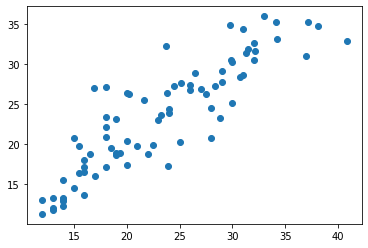

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test2,y_predicted_test2)
fig.show()